In [1]:
import matplotlib.pyplot as plt
from scipy.special import comb

Para la distribución binomial uso el código de la clase 10, pero a estas funciones les saco la variable p, y defino p adentro de las funciones, de manera que sea dependiente de r.

In [2]:
def realizar_experimento(muestra, dist):

    '''
    Definimos una función que simula realizar un experimento.
    Toma una muestra que es una lista con todos los posibles resultados de realizar n-1 experimentos
    y regresa una lista con todos los posibles resultados de realizar n experimentos.
    muestra y dist son la distribución de n-1 experimentos y la distribución de un experimento.
    '''
    nueva = {}
    if len(muestra) == 0:
        return {e:p for e, p in dist.items()}
    for e, prob_e in muestra.items():
        for res, prob_r in dist.items():
            nuevo_evento = e + res
            nueva_prob = prob_e*prob_r
            nueva[nuevo_evento] = nueva_prob
    return nueva


In [3]:
def r_experimentos(r):
    '''
    Función que simula los eventos de r píxeles
    '''
    p=2*(r)**-1
    #p es la probabilidad que depende de r, p=2/r

    dist_un_experimento = {'+': p, '-': (1-p)}
    muestra = {}
    for i in range(r):
        muestra = realizar_experimento(muestra, dist_un_experimento)
    return muestra


In [4]:
def n_exitos(n, e):
    return e.count('+') == n

In [5]:
def binomial_fuerza_bruta(n, r):
    '''
    Calcula la distribución polinomial, para el caso de r píxeles con una cantidad de n partículas por segundo.
    '''

    p=2*(r)**-1
    dist = r_experimentos(r, p)
    def evento(e):
        return n_exitos(n, e)
    return prob(evento, dist)

In [6]:
def binomial(n, r):
  p=2*(r)**-1
  return comb(r, n)*p**n*(1-p)**(r - n)

In [7]:
def probs(r):
  p=2*(r)**-1
  return [binomial(n, r) for n in range(r+1)]

C:\Users\Javier_U\AppData\Local\Temp\ipykernel_8836\2057621571.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


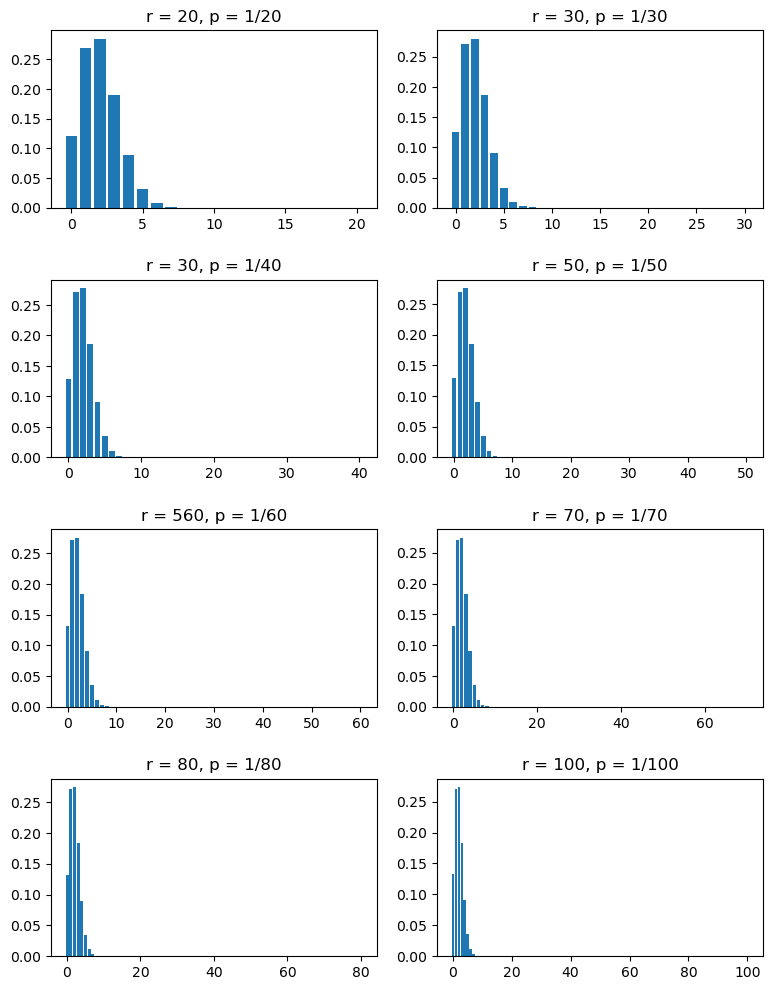

In [8]:
fig = plt.figure(figsize=(8,20), dpi= 100)

ax1 = fig.add_subplot(8,2,1)
ax2 = fig.add_subplot(8,2,2)
ax3 = fig.add_subplot(8,2,3)
ax4 = fig.add_subplot(8,2,4)
ax5 = fig.add_subplot(8,2,5)
ax6 = fig.add_subplot(8,2,6)
ax7 = fig.add_subplot(8,2,7)
ax8 = fig.add_subplot(8,2,8)

ax1.bar(range(20+1), probs(20))
ax2.bar(range(30+1), probs(30))
ax3.bar(range(40+1), probs(40))
ax4.bar(range(50+1), probs(50))
ax5.bar(range(60+1), probs(60))
ax6.bar(range(70+1), probs(70))
ax7.bar(range(80+1), probs(80))
ax8.bar(range(100+1), probs(100))

ax1.set_title('r = 20, p = 1/20')
ax2.set_title('r = 30, p = 1/30')
ax3.set_title('r = 30, p = 1/40')
ax4.set_title('r = 50, p = 1/50')
ax5.set_title('r = 560, p = 1/60')
ax6.set_title('r = 70, p = 1/70')
ax7.set_title('r = 80, p = 1/80')
ax8.set_title('r = 100, p = 1/100')

fig.tight_layout(pad=2.0)


fig.show()

Se puede usar la distribucuion de poisson, ya que para poisson debemos tender r al infinito y en este caso podríamos tender los píxeles al infinito y seguir trabajando sin ningún problema y cumpliendo la condición r>>2

# Calificacion: 7.0